In [82]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR

In [3]:
res = requests.get('https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv')
with open('covid.csv', 'wb') as csvf:
    csvf.write(res.content)

In [13]:
df = pd.read_csv('covid.csv', parse_dates=['fecha'], usecols=['fecha', 'ccaa_iso', 'num_casos'])
df.head()

,ccaa_iso,fecha,num_casos
0,AN,2020-01-01,0
1,AR,2020-01-01,0
2,AS,2020-01-01,0
3,CB,2020-01-01,0
4,CE,2020-01-01,0


In [26]:
ccaas = df.ccaa_iso.unique()
ccaas

array(['AN', 'AR', 'AS', 'CB', 'CE', 'CL', 'CM', 'CN', 'CT', 'EX', 'GA',
       'IB', 'MC', 'MD', 'ML', 'NC', 'PV', 'RI', 'VC'], dtype=object)

<AxesSubplot:xlabel='fecha'>

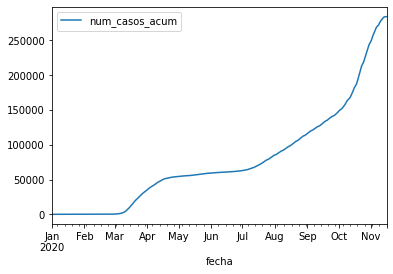

In [93]:
ccaa = 'CT' #catalunya
df_ccaa = df.loc[df.ccaa_iso == ccaa][['fecha', 'num_casos']].set_index('fecha')
casos = df_ccaa
casos_acum = casos.cumsum().rename(columns={'num_casos': 'num_casos_acum'})
casos_acum.plot()
#casos_acum.head()

<AxesSubplot:xlabel='fecha'>

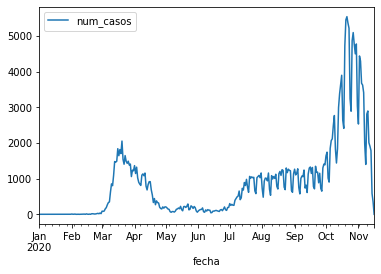

In [94]:
casos.plot()

In [95]:
casos_array = casos_acum.to_numpy()
days = np.asarray([i for i in range(len(cases))]).reshape(-1, 1)
future_forcast = np.asarray([i for i in range(len(cases) + 50)]).reshape(-1, 1)

In [96]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, casos_array, test_size=0.05, shuffle=False) 
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

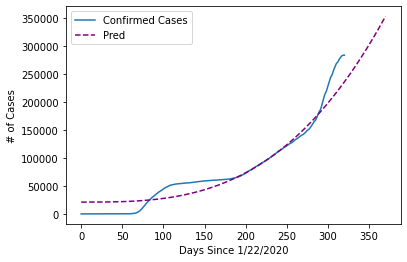

In [73]:
#plt.figure(figsize=(16, 10))
plt.plot(days, casos_acum)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Confirmed Cases', 'Pred'])
plt.xticks()
plt.yticks()
plt.show()

In [97]:
json_data = {}
casos_json = json.loads(casos.to_json(date_format='iso'))
casos_acum_json = json.loads(casos_acum.to_json(date_format='iso'))
pred = {'svm_pred': {}}
d = datetime(day=1, month=1, year=2020)
for x in svm_pred:
    diso = d.isoformat(timespec='milliseconds')+'Z'
    pred['svm_pred'][diso] = x
    d = d + timedelta(days=1)
json_data.update(casos_json)
json_data.update(casos_acum_json)
json_data.update(pred)

with open('data.json', 'w') as jsond:
    jsond.write(json.dumps(json_data,indent=4))

AN


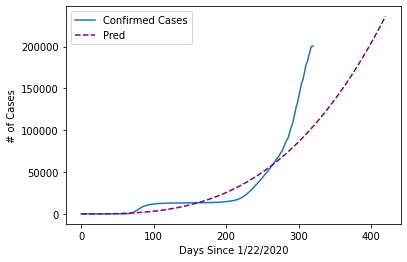

AR


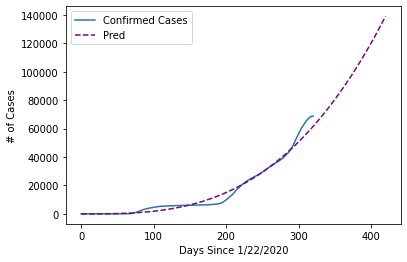

AS


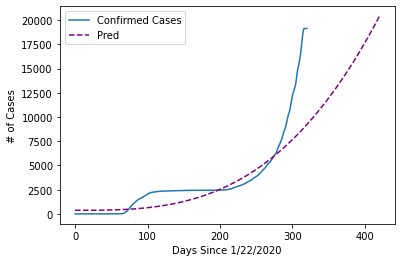

CB


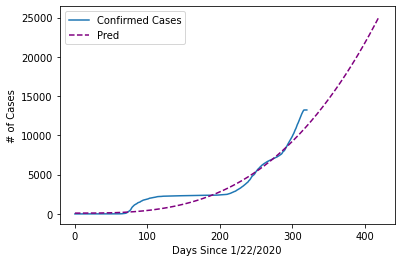

CE


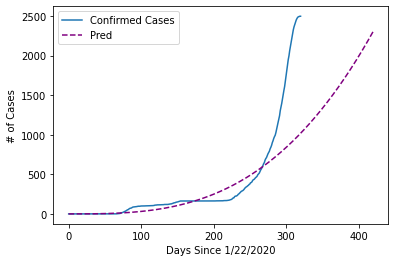

CL


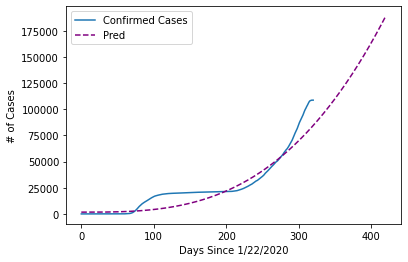

CM


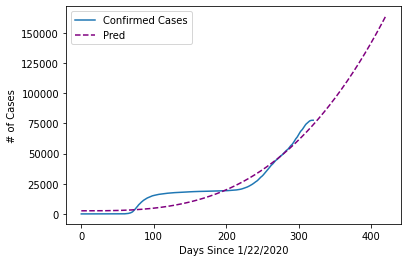

CN


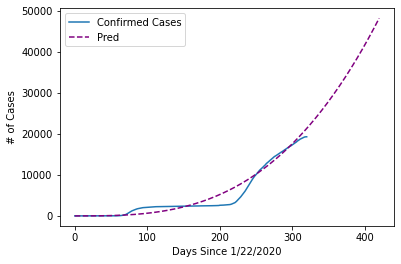

CT


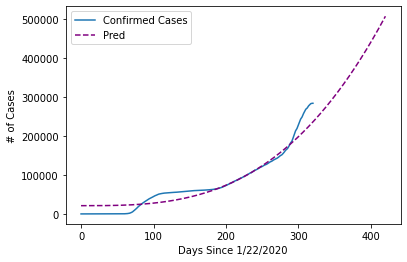

EX


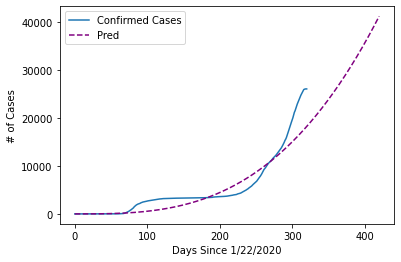

GA


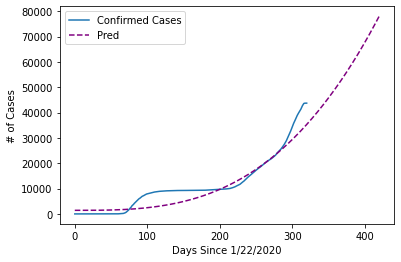

IB


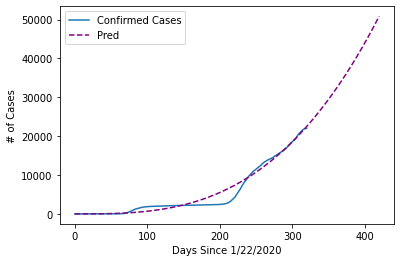

MC


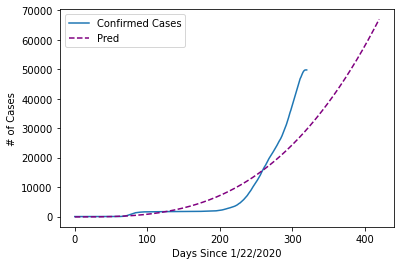

MD


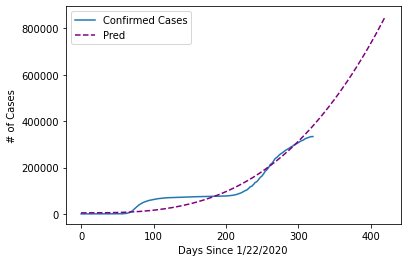

ML


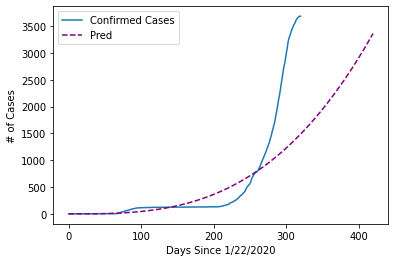

NC


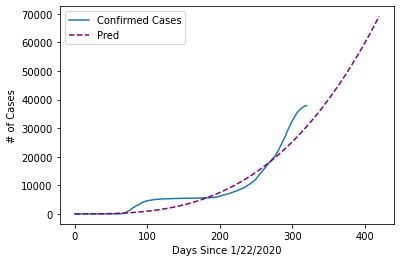

PV


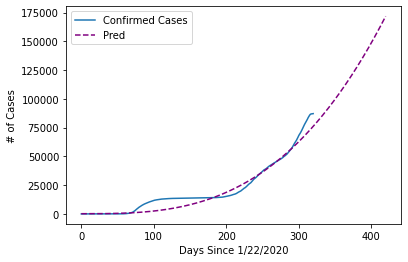

RI


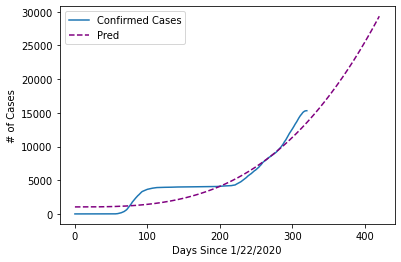

VC


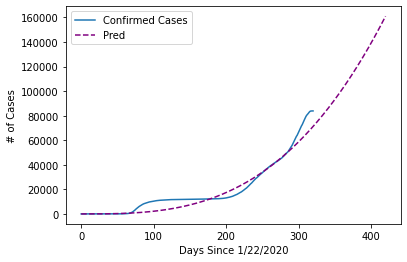

In [66]:
for ccaa in ccaas:
    print(ccaa)
    df_ccaa = df.loc[df.ccaa_iso == ccaa][['fecha', 'num_casos']].set_index('fecha')
    casos = df_ccaa
    casos_acum = casos.cumsum()
    casos_array = casos_acum.to_numpy()
    days = np.asarray([i for i in range(len(cases))]).reshape(-1, 1)
    future_forcast = np.asarray([i for i in range(len(cases) + 100)]).reshape(-1, 1)
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, casos_array, test_size=0.05, shuffle=False) 
    svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
    svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
    svm_pred = svm_confirmed.predict(future_forcast)
    #plt.figure(figsize=(16, 10))
    plt.plot(days, casos_acum)
    plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
    #plt.title('Worldwide Coronavirus Cases Over Time')
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('# of Cases')
    plt.legend(['Confirmed Cases', 'Pred'])
    plt.xticks()
    plt.yticks()
    plt.show()